In [165]:
using CSV
using DataFrames
using RollingFunctions
using StatsBase
using ShiftedArrays
using PairPlots
using CairoMakie
using StatsPlots
using Chain
using Query
gr()

Plots.GRBackend()

In [116]:
df = DataFrame(CSV.File("Adult.csv", missingstring="?"))

Row,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
,Int64,String31?,Int64,String15,Int64,String31,String31?,String15,String31,String7,Int64,Int64,Int64,String31?,String7
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,18,missing,103497,Some-college,10,Never-married,missing,Own-child,White,Female,0,0,30,United-States,<=50K
6,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,29,missing,227026,HS-grad,9,Never-married,missing,Unmarried,Black,Male,0,0,40,United-States,<=50K
8,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
9,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K


In [33]:
describe(df)
totals = describe(df, sum => :sum)

Row,variable,sum
,Symbol,Union…
1,Age,1887430
2,Type_Employer,
3,fnlwgt,9263575662
4,Education,
5,Education_num,492234
6,Marital,
7,occupation,
8,Relationship,
9,Race,


In [27]:
fnlwgt = totals[3, 2]

9263575662

In [28]:
factor = 260_737_999.0/fnlwgt

0.02814658275740869

In [30]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,age,38.6436,17,37.0,90,0,Int64
2,workclass,,?,,Without-pay,0,String31
3,fnlwgt,1.89664e5,12285,1.78144e5,1490400,0,Int64
4,education,,10th,,Some-college,0,String15
5,education_num,10.0781,1,10.0,16,0,Int64
6,marital_status,,Divorced,,Widowed,0,String31
7,occupation,,?,,Transport-moving,0,String31
8,relationship,,Husband,,Wife,0,String15
9,race,,Amer-Indian-Eskimo,,White,0,String31


In [31]:
12285 * factor

345.7807691747658

In [35]:
first(df,5)

Row,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
,Int64,String31,Int64,String15,Int64,String31,String31,String15,String31,String7,Int64,Int64,Int64,String31,String7
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [36]:
last(df,5)

Row,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
,Int64,String31,Int64,String15,Int64,String31,String31,String15,String31,String7,Int64,Int64,Int64,String31,String7
1,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
2,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
3,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
4,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
5,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [37]:
unique(df)

Row,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
,Int64,String31,Int64,String15,Int64,String31,String31,String15,String31,String7,Int64,Int64,Int64,String31,String7
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
8,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
9,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K


In [41]:
filter(:age => ==(24), df)

Row,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
,Int64,String31,Int64,String15,Int64,String31,String31,String15,String31,String7,Int64,Int64,Int64,String31,String7
1,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
2,24,Self-emp-not-inc,188274,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,50,United-States,<=50K
3,24,Private,83141,Some-college,10,Separated,Other-service,Not-in-family,White,Male,0,1876,40,United-States,<=50K
4,24,Federal-gov,228724,Some-college,10,Never-married,Armed-Forces,Not-in-family,White,Male,0,0,40,United-States,<=50K
5,24,Private,247846,HS-grad,9,Never-married,Craft-repair,Unmarried,Black,Female,0,0,40,United-States,<=50K
6,24,Private,325596,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,45,United-States,<=50K
7,24,Private,313956,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
8,24,Private,224238,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
9,24,Private,279175,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [45]:
subset(df, :education => x -> x .=="Bachelors")

Row,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
,Int64,String31,Int64,String15,Int64,String31,String31,String15,String31,String7,Int64,Int64,Int64,String31,String7
1,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
2,34,Private,107914,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,47,United-States,>50K
3,25,Private,220931,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,43,Peru,<=50K
4,25,Private,205947,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
5,24,Self-emp-not-inc,188274,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,50,United-States,<=50K
6,36,Local-gov,403681,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
7,34,Local-gov,382078,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,3103,0,50,United-States,>50K
8,30,Private,101135,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,<=50K
9,41,Private,109912,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,?,<=50K


In [46]:
df[6:10, :]

Row,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
,Int64,String31,Int64,String15,Int64,String31,String31,String15,String31,String7,Int64,Int64,Int64,String31,String7
1,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
2,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
3,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
4,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
5,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [50]:
df[df.marital_status .== "Never-married", :]

Row,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
,Int64,String31,Int64,String15,Int64,String31,String31,String15,String31,String7,Int64,Int64,Int64,String31,String7
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
2,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
3,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
4,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
5,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
6,26,Private,82091,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,39,United-States,<=50K
7,20,State-gov,444554,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,25,United-States,<=50K
8,34,Private,238588,Some-college,10,Never-married,Other-service,Own-child,Black,Female,0,0,35,United-States,<=50K
9,25,Private,220931,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,43,Peru,<=50K


In [53]:
df[findfirst(==(30), df.age), :]

Row,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
,Int64,String31,Int64,String15,Int64,String31,String31,String15,String31,String7,Int64,Int64,Int64,String31,String7
61,30,Private,101135,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,<=50K


In [57]:
df[findall(==(30), df.age), :]

Row,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
,Int64,String31,Int64,String15,Int64,String31,String31,String15,String31,String7,Int64,Int64,Int64,String31,String7
1,30,Private,101135,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,<=50K
2,30,Private,229636,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
3,30,Private,142921,Assoc-acdm,12,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,30,State-gov,260782,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
5,30,Private,296462,HS-grad,9,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,40,United-States,<=50K
6,30,Private,236543,9th,5,Married-civ-spouse,Other-service,Husband,White,Male,0,0,32,El-Salvador,>50K
7,30,Private,238186,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Other-relative,White,Male,0,2057,48,United-States,<=50K
8,30,Private,169269,11th,7,Never-married,Handlers-cleaners,Other-relative,White,Male,0,1721,38,Puerto-Rico,<=50K
9,30,Private,446894,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,30,United-States,<=50K


In [60]:
select(df, :occupation)

Row,occupation
,String31
1,Machine-op-inspct
2,Farming-fishing
3,Protective-serv
4,Machine-op-inspct
5,?
6,Other-service
7,?
8,Prof-specialty
9,Other-service


In [61]:
select(df, "occupation")

Row,occupation
,String31
1,Machine-op-inspct
2,Farming-fishing
3,Protective-serv
4,Machine-op-inspct
5,?
6,Other-service
7,?
8,Prof-specialty
9,Other-service


In [62]:
select(df, [:occupation, :class])

Row,occupation,class
,String31,String7
1,Machine-op-inspct,<=50K
2,Farming-fishing,<=50K
3,Protective-serv,>50K
4,Machine-op-inspct,>50K
5,?,<=50K
6,Other-service,<=50K
7,?,<=50K
8,Prof-specialty,>50K
9,Other-service,<=50K


In [65]:
select(df, 2:5)

Row,workclass,fnlwgt,education,education_num
,String31,Int64,String15,Int64
1,Private,226802,11th,7
2,Private,89814,HS-grad,9
3,Local-gov,336951,Assoc-acdm,12
4,Private,160323,Some-college,10
5,?,103497,Some-college,10
6,Private,198693,10th,6
7,?,227026,HS-grad,9
8,Self-emp-not-inc,104626,Prof-school,15
9,Private,369667,Some-college,10


In [66]:
select(df, r"^o")

Row,occupation
,String31
1,Machine-op-inspct
2,Farming-fishing
3,Protective-serv
4,Machine-op-inspct
5,?
6,Other-service
7,?
8,Prof-specialty
9,Other-service


In [67]:
select(df, Not(:fnlwgt))

Row,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
,Int64,String31,String15,Int64,String31,String31,String15,String31,String7,Int64,Int64,Int64,String31,String7
1,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
2,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
3,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
4,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,29,?,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
8,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
9,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K


In [68]:
select(df, Between(:education,:race))

Row,education,education_num,marital_status,occupation,relationship,race
,String15,Int64,String31,String31,String15,String31
1,11th,7,Never-married,Machine-op-inspct,Own-child,Black
2,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White
3,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White
4,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black
5,Some-college,10,Never-married,?,Own-child,White
6,10th,6,Never-married,Other-service,Not-in-family,White
7,HS-grad,9,Never-married,?,Unmarried,Black
8,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White
9,Some-college,10,Never-married,Other-service,Unmarried,White


In [71]:
df[:,[:education, :occupation]]

Row,education,occupation
,String15,String31
1,11th,Machine-op-inspct
2,HS-grad,Farming-fishing
3,Assoc-acdm,Protective-serv
4,Some-college,Machine-op-inspct
5,Some-college,?
6,10th,Other-service
7,HS-grad,?
8,Prof-school,Prof-specialty
9,Some-college,Other-service


In [72]:
df[!,[:education, :occupation]]

Row,education,occupation
,String15,String31
1,11th,Machine-op-inspct
2,HS-grad,Farming-fishing
3,Assoc-acdm,Protective-serv
4,Some-college,Machine-op-inspct
5,Some-college,?
6,10th,Other-service
7,HS-grad,?
8,Prof-school,Prof-specialty
9,Some-college,Other-service


In [73]:
names(df)

15-element Vector{String}:
 "age"
 "workclass"
 "fnlwgt"
 "education"
 "education_num"
 "marital_status"
 "occupation"
 "relationship"
 "race"
 "sex"
 "capital_gain"
 "capital_loss"
 "hours_per_week"
 "native_country"
 "class"

In [74]:
propertynames(df)

15-element Vector{Symbol}:
 :age
 :workclass
 :fnlwgt
 :education
 :education_num
 :marital_status
 :occupation
 :relationship
 :race
 :sex
 :capital_gain
 :capital_loss
 :hours_per_week
 :native_country
 :class

In [75]:
columnindex(df, "occupation")

7

In [76]:
sort(df, :age)

Row,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
,Int64,String31,Int64,String15,Int64,String31,String31,String15,String31,String7,Int64,Int64,Int64,String31,String7
1,17,Private,269430,10th,6,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,17,?,165361,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
3,17,Private,40299,11th,7,Never-married,Sales,Own-child,White,Female,0,0,25,United-States,<=50K
4,17,Private,190941,10th,6,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
5,17,?,143331,11th,7,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
6,17,Private,61838,11th,7,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,<=50K
7,17,Private,28544,11th,7,Never-married,Sales,Not-in-family,White,Female,0,0,20,United-States,<=50K
8,17,Private,81010,11th,7,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
9,17,Private,310885,7th-8th,4,Never-married,Other-service,Own-child,White,Male,0,0,36,Mexico,<=50K


In [78]:
sort(df, :age, rev=true)

Row,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
,Int64,String31,Int64,String15,Int64,String31,String31,String15,String31,String7,Int64,Int64,Int64,String31,String7
1,90,Private,149069,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,1825,50,United-States,>50K
2,90,Self-emp-not-inc,83601,Prof-school,15,Widowed,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
3,90,Private,250832,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,2414,0,40,United-States,<=50K
4,90,Private,227796,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Male,6097,0,45,United-States,>50K
5,90,Self-emp-not-inc,122348,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,45,United-States,>50K
6,90,Federal-gov,311184,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,99,United-States,<=50K
7,90,Private,225063,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,South,<=50K
8,90,Local-gov,188242,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,11678,0,40,United-States,>50K
9,90,?,50746,10th,6,Divorced,?,Not-in-family,White,Female,0,0,7,United-States,<=50K


In [81]:
sort(df, [:age, order(:occupation, rev = true)])

Row,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
,Int64,String31,Int64,String15,Int64,String31,String31,String15,String31,String7,Int64,Int64,Int64,String31,String7
1,17,Private,355850,11th,7,Never-married,Transport-moving,Own-child,White,Male,0,1602,15,United-States,<=50K
2,17,Private,188949,11th,7,Never-married,Transport-moving,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,17,Private,121470,12th,8,Never-married,Transport-moving,Own-child,White,Male,0,0,10,?,<=50K
4,17,Private,327127,11th,7,Never-married,Transport-moving,Own-child,White,Male,0,0,20,United-States,<=50K
5,17,Private,176467,9th,5,Never-married,Transport-moving,Not-in-family,White,Male,0,0,20,United-States,<=50K
6,17,Private,132636,11th,7,Never-married,Transport-moving,Own-child,White,Female,0,0,16,United-States,<=50K
7,17,Private,186067,10th,6,Never-married,Tech-support,Own-child,White,Male,0,0,10,United-States,<=50K
8,17,Private,40299,11th,7,Never-married,Sales,Own-child,White,Female,0,0,25,United-States,<=50K
9,17,Private,190941,10th,6,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K


In [84]:
select(df, :fnlwgt => cumprod)

Row,fnlwgt_cumprod
,Int64
1,226802
2,20369994828
3,6863690127289428
4,-6397252145150131716
5,-5866973019955609380
6,-2925260038489718836
7,-8852100549340734120
8,-4192366588190054608
9,5177052181352691088


In [86]:
select(df, :fnlwgt => v -> accumulate(min,v))

Row,fnlwgt_function
,Int64
1,226802
2,89814
3,89814
4,89814
5,89814
6,89814
7,89814
8,89814
9,89814


In [87]:
select(df, :fnlwgt => v -> accumulate(max,v))

Row,fnlwgt_function
,Int64
1,226802
2,226802
3,336951
4,336951
5,336951
6,336951
7,336951
8,336951
9,369667


In [88]:
select(df, :fnlwgt => v -> cumsum(v) ./ (1:length(v)))

Row,fnlwgt_function
,Float64
1,226802.0
2,158308.0
3,2.17856e5
4,2.03472e5
5,1.83477e5
6,1.86013e5
7,1.91872e5
8,1.80966e5
9,2.01933e5


In [93]:
select(df, :fnlwgt =>(v -> runmean(v,10)))

Row,fnlwgt_function
,Float64
1,226802.0
2,158308.0
3,2.17856e5
4,2.03472e5
5,1.83477e5
6,1.86013e5
7,1.91872e5
8,1.80966e5
9,2.01933e5


In [96]:
select(df, :fnlwgt =>(v -> runmax(v,10)))

Row,fnlwgt_function
,Int64
1,226802
2,226802
3,336951
4,336951
5,336951
6,336951
7,336951
8,336951
9,369667


In [97]:
select(df, :fnlwgt => ordinalrank)

Row,fnlwgt_ordinalrank
,Int64
1,35166
2,7149
3,44431
4,20001
5,9240
6,29930
7,35212
8,9501
9,46036


In [99]:
select(df, :fnlwgt => competerank)

Row,fnlwgt_competerank
,Int64
1,35166
2,7149
3,44431
4,20001
5,9240
6,29930
7,35212
8,9501
9,46036


In [100]:
select(df, :fnlwgt => tiedrank)

Row,fnlwgt_tiedrank
,Float64
1,35166.0
2,7149.0
3,44432.5
4,20001.5
5,9240.0
6,29930.0
7,35212.5
8,9501.0
9,46036.0


In [105]:
select(df, :fnlwgt => lag)

LoadError: UndefVarError: `lag` not defined

In [108]:
@pipe df |>
    filter(:sex => ==("Male"),_) |>
    groupby(_,:occupation) |>
    combine(_,:age => mean)

Row,occupation,age_mean
,String31,Float64
1,Machine-op-inspct,37.4378
2,Farming-fishing,41.3964
3,Protective-serv,39.3995
4,?,43.3646
5,Other-service,34.444
6,Prof-specialty,41.6285
7,Craft-repair,38.9639
8,Adm-clerical,37.6069
9,Exec-managerial,43.2312


In [111]:
combine(df, :fnlwgt => sum)

Row,fnlwgt_sum
,Int64
1,9263575662


In [112]:
combine(df, :fnlwgt => sum)[1,1]

9263575662

In [113]:
combine(df, :fnlwgt => sum => :fnlwgt_total)

Row,fnlwgt_total
,Int64
1,9263575662


In [117]:
combine(df, :age => (x -> mean(skipmissing(x))))

Row,age_function
,Float64
1,38.6436


In [119]:
combine(df, [:capital_gain, :capital_loss] .=> maximum)

Row,capital_gain_maximum,capital_loss_maximum
,Int64,Int64
1,99999,4356


In [125]:
transform(df, :fnlwgt => sum => :total_fnlwgt)

Row,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,total_fnlwgt
,Int64,String31?,Int64,String15,Int64,String31,String31?,String15,String31,String7,Int64,Int64,Int64,String31?,String7,Int64
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,9263575662
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,9263575662
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,9263575662
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,9263575662
5,18,missing,103497,Some-college,10,Never-married,missing,Own-child,White,Female,0,0,30,United-States,<=50K,9263575662
6,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,9263575662
7,29,missing,227026,HS-grad,9,Never-married,missing,Unmarried,Black,Male,0,0,40,United-States,<=50K,9263575662
8,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,9263575662
9,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K,9263575662


In [134]:
hcat(df, select(transform(df, :fnlwgt => sum => :total_fnlwgt), :total_fnlwgt => x -> 260_737_000 ./ x))

Row,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,total_fnlwgt_function
,Int64,String31?,Int64,String15,Int64,String31,String31?,String15,String31,String7,Int64,Int64,Int64,String31?,String7,Float64
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0.0281465
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0.0281465
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0.0281465
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,0.0281465
5,18,missing,103497,Some-college,10,Never-married,missing,Own-child,White,Female,0,0,30,United-States,<=50K,0.0281465
6,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,0.0281465
7,29,missing,227026,HS-grad,9,Never-married,missing,Unmarried,Black,Male,0,0,40,United-States,<=50K,0.0281465
8,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,0.0281465
9,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K,0.0281465


In [135]:
groupby(df, :occupation)

Row,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
,Int64,String31?,Int64,String15,Int64,String31,String31?,String15,String31,String7,Int64,Int64,Int64,String31?,String7
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
3,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
4,48,Private,279724,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K
5,37,Private,60548,HS-grad,9,Widowed,Machine-op-inspct,Unmarried,White,Female,0,0,20,United-States,<=50K
6,23,Private,134446,HS-grad,9,Separated,Machine-op-inspct,Unmarried,Black,Male,0,0,54,United-States,<=50K
7,17,Private,269430,10th,6,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
8,33,Private,281384,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,40,United-States,<=50K
9,30,Private,229636,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K


In [137]:
gdf = groupby(df, [:occupation, :class])

Row,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
,Int64,String31?,Int64,String15,Int64,String31,String31?,String15,String31,String7,Int64,Int64,Int64,String31?,String7
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
2,37,Private,60548,HS-grad,9,Widowed,Machine-op-inspct,Unmarried,White,Female,0,0,20,United-States,<=50K
3,23,Private,134446,HS-grad,9,Separated,Machine-op-inspct,Unmarried,Black,Male,0,0,54,United-States,<=50K
4,17,Private,269430,10th,6,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
5,33,Private,281384,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,40,United-States,<=50K
6,30,Private,229636,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
7,41,Private,75012,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,50,United-States,<=50K
8,45,Self-emp-inc,67001,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,50,United-States,<=50K
9,43,Private,170482,HS-grad,9,Separated,Machine-op-inspct,Not-in-family,White,Female,0,0,44,United-States,<=50K


In [139]:
keys(gdf)

Base.Iterators.Filter{Base.var"#639#640"{Base.SkipMissing{GroupedDataFrame{DataFrame}}}, DataFrames.GroupKeys{GroupedDataFrame{DataFrame}}}(Base.var"#639#640"{Base.SkipMissing{GroupedDataFrame{DataFrame}}}(skipmissing(GroupedDataFrame with 30 groups based on keys: occupation, class
First Group (2650 rows): occupation = "Machine-op-inspct", class = "<=50K"
  Row │ age    workclass     fnlwgt  education     education_num  marital_stat ⋯
      │ Int64  String31?     Int64   String15      Int64          String31     ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │    25  Private       226802  11th                      7  Never-marrie ⋯
    2 │    37  Private        60548  HS-grad                   9  Widowed
    3 │    23  Private       134446  HS-grad                   9  Separated
    4 │    17  Private       269430  10th                      6  Never-marrie
    5 │    33  Private       281384  HS-grad                   9  Never-marrie ⋯
  ⋮   │ 

In [140]:
combine(gdf, :capital_gain => mean)

Row,occupation,class,capital_gain_mean
,String31?,String7,Float64
1,Machine-op-inspct,<=50K,145.704
2,Machine-op-inspct,>50K,1522.85
3,Farming-fishing,<=50K,214.17
4,Farming-fishing,>50K,4535.75
5,Protective-serv,<=50K,209.824
6,Protective-serv,>50K,1828.72
7,missing,<=50K,133.646
8,missing,>50K,4029.25
9,Other-service,<=50K,93.1875


In [144]:
combine(gdf) do sdf
    DataFrame(capital_gain = sum(sdf.capital_gain))
end

Row,occupation,class,capital_gain
,String31?,String7,Int64
1,Machine-op-inspct,<=50K,386116
2,Machine-op-inspct,>50K,566502
3,Farming-fishing,<=50K,282062
4,Farming-fishing,>50K,784685
5,Protective-serv,<=50K,141631
6,Protective-serv,>50K,563245
7,missing,<=50K,339996
8,missing,>50K,1067750
9,Other-service,<=50K,439752


In [148]:
combine(gdf, AsTable(:) => t -> sum(t.capital_loss .+ t.capital_gain))

Row,occupation,class,age_workclass_etc_function
,String31?,String7,Int64
1,Machine-op-inspct,<=50K,523250
2,Machine-op-inspct,>50K,624237
3,Farming-fishing,<=50K,340051
4,Farming-fishing,>50K,815115
5,Protective-serv,<=50K,177421
6,Protective-serv,>50K,611016
7,missing,<=50K,485020
8,missing,>50K,1112036
9,Other-service,<=50K,611363


In [152]:
transform(df, [:capital_gain, :capital_loss] => ByRow(+) => :what_three)

Row,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,what_three
,Int64,String31?,Int64,String15,Int64,String31,String31?,String15,String31,String7,Int64,Int64,Int64,String31?,String7,Int64
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,7688
5,18,missing,103497,Some-college,10,Never-married,missing,Own-child,White,Female,0,0,30,United-States,<=50K,0
6,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,0
7,29,missing,227026,HS-grad,9,Never-married,missing,Unmarried,Black,Male,0,0,40,United-States,<=50K,0
8,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,3103
9,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K,0


In [163]:
transform(df, :capital_gain => ByRow(x -> x * 10) => [:ans])

Row,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,ans
,Int64,String31?,Int64,String15,Int64,String31,String31?,String15,String31,String7,Int64,Int64,Int64,String31?,String7,Int64
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,76880
5,18,missing,103497,Some-college,10,Never-married,missing,Own-child,White,Female,0,0,30,United-States,<=50K,0
6,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,0
7,29,missing,227026,HS-grad,9,Never-married,missing,Unmarried,Black,Male,0,0,40,United-States,<=50K,0
8,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,31030
9,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K,0


In [166]:
wd = df |> @filter(strip(_.marital_status,[' ']) == "Widowed") |> DataFrame

df2 = wd |>
    @groupby(_.age) |>
    @map({total=sum(_.fnlwgt), age=_.age, marital_status = _.marital_status}) |>
    @orderby_descending(_.age) |>
    DataFrame

Row,total,age,marital_status
,Int64,GroupCol…,GroupCol…
1,1027607,"[90, 90, 90, 90, 90, 90, 90]","String31[""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed""]"
2,141646,[88],"String31[""Widowed""]"
3,187633,"[87, 87]","String31[""Widowed"", ""Widowed""]"
4,625700,"[85, 85, 85, 85]","String31[""Widowed"", ""Widowed"", ""Widowed"", ""Widowed""]"
5,1376282,"[84, 84, 84, 84, 84, 84, 84, 84]","String31[""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed""]"
6,768662,"[83, 83, 83, 83]","String31[""Widowed"", ""Widowed"", ""Widowed"", ""Widowed""]"
7,941061,"[82, 82, 82, 82, 82, 82, 82, 82]","String31[""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed""]"
8,2250453,"[81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81]","String31[""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed""]"
9,1487433,"[80, 80, 80, 80, 80, 80, 80, 80, 80, 80]","String31[""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed"", ""Widowed""]"


In [167]:
q = [df2[i,:total] for i in 1:size(df2,1)]
p = getindex.([df2[i,:age] |> @unique() |> collect for i in 1:size(df2,1)],1)

69-element Vector{Int64}:
 90
 88
 87
 85
 84
 83
 82
 81
 80
 79
 78
 77
 76
  ⋮
 31
 30
 29
 28
 27
 26
 25
 23
 22
 21
 18
 17

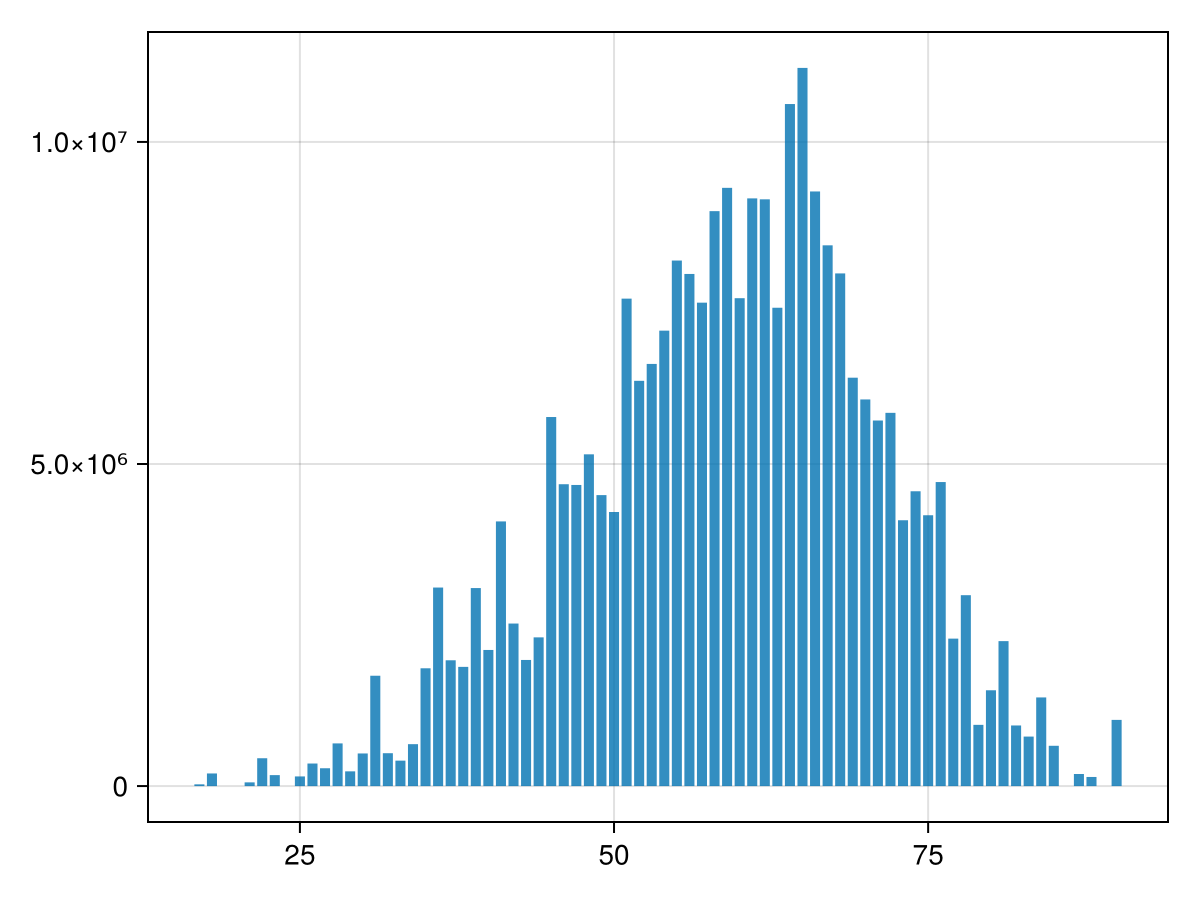

In [168]:
CairoMakie.barplot(p,q)